<a href="https://colab.research.google.com/github/zzprogram/APM1111/blob/main/Lab_FA1_Curimatmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Using R

  Class_Interval Frequency Class_Marks Lower_Bound Upper_Bound Cum_Freq_Less
1        140-149        45       144.5       139.5       149.5            45
2        150-159       291       154.5       149.5       159.5           336
3        160-169       106       164.5       159.5       169.5           442
4        170-179        43       174.5       169.5       179.5           485
5        180-189        11       184.5       179.5       189.5           496
6        190-199         2       194.5       189.5       199.5           498
7        200-209         1       204.5       199.5       209.5           499
8        210-219         1       214.5       209.5       219.5           500
  Cum_Freq_Greater
1              500
2              455
3              164
4               58
5               15
6                4
7                2
8                1


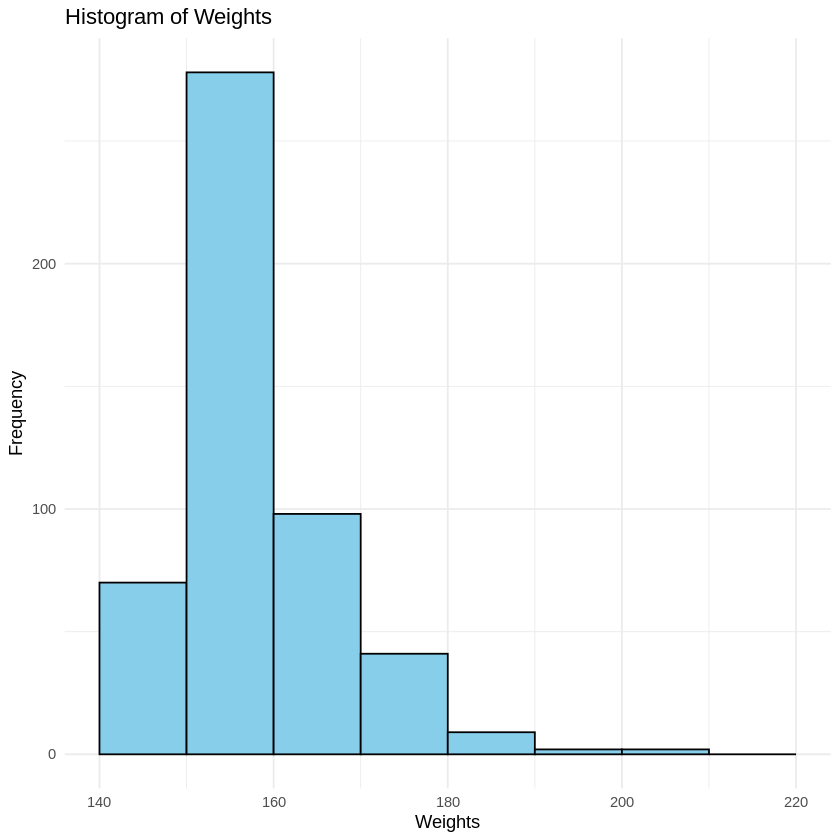

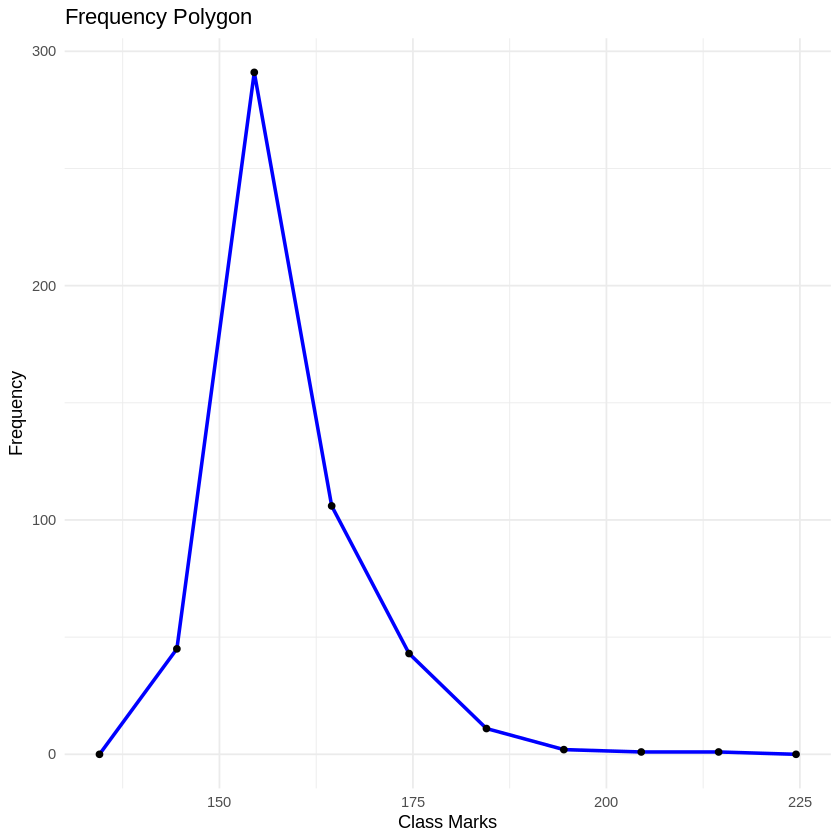

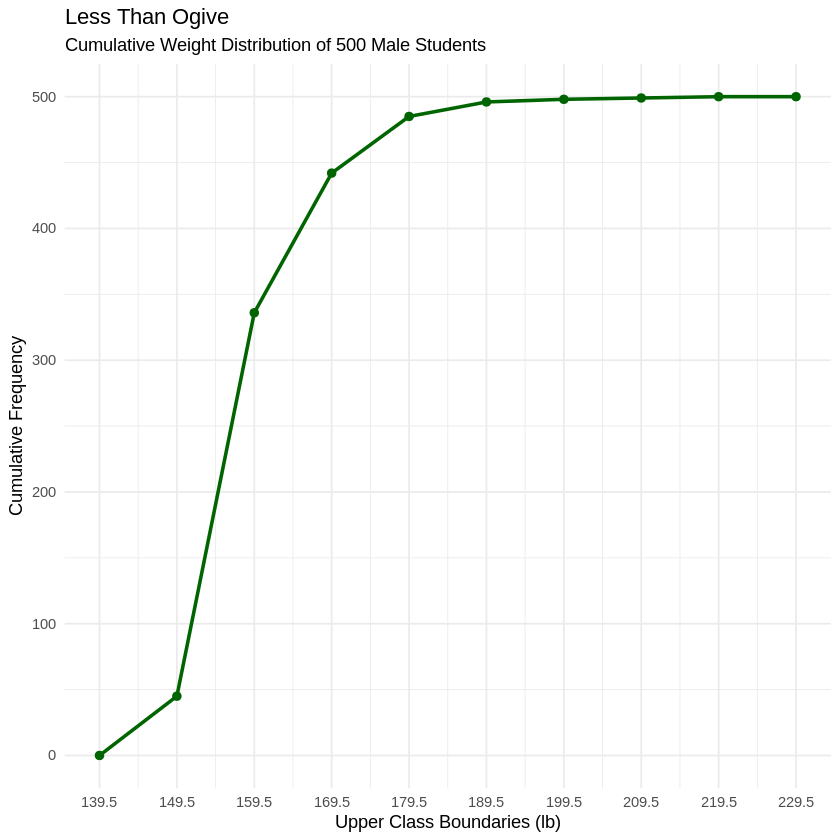

In [8]:

if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# read dataset
data <- read.csv("Dataset.csv")
weights <- data[[1]]

breaks <- seq(140, 220, by = 10)
labels <- paste(breaks[-length(breaks)], breaks[-1] - 1, sep = "-")

# 1. frequency distribution table
freq_counts <- table(cut(weights, breaks = breaks, right = FALSE, labels = labels))
fdt <- data.frame(
  Class_Interval = names(freq_counts),
  Frequency = as.vector(freq_counts)
)

fdt$Class_Marks <- (breaks[-length(breaks)] + (breaks[-1] - 1)) / 2
fdt$Lower_Bound <- breaks[-length(breaks)] - 0.5
fdt$Upper_Bound <- (breaks[-1] - 1) + 0.5
fdt$Cum_Freq_Less <- cumsum(fdt$Frequency)
fdt$Cum_Freq_Greater <- rev(cumsum(rev(fdt$Frequency)))

print(fdt)

# 2. histogram
ggplot(data.frame(weights), aes(x = weights)) +
  geom_histogram(breaks = breaks, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Weights", x = "Weights", y = "Frequency") +
  theme_minimal()

# 3. frequency polygon
poly_data <- data.frame(
  x = c(fdt$Class_Marks[1]-10, fdt$Class_Marks, fdt$Class_Marks[nrow(fdt)]+10),
  y = c(0, fdt$Frequency, 0)
)
ggplot(poly_data, aes(x = x, y = y)) +
  geom_line(color = "blue", size = 1) +
  geom_point() +
  labs(title = "Frequency Polygon", x = "Class Marks", y = "Frequency") +
  theme_minimal()

# 4. ogives
upper_boundaries <- seq(139.5, 229.5, by = 10)
cum_freq <- c(0, cumsum(as.vector(freq_table)))

ogive_data <- data.frame(
  Boundary = upper_boundaries,
  Cumulative_Frequency = cum_freq
)

ggplot(ogive_data, aes(x = Boundary, y = Cumulative_Frequency)) +
  geom_line(color = "darkgreen", linewidth = 1) +
  geom_point(color = "darkgreen", size = 2) +
  scale_x_continuous(breaks = upper_boundaries) +
  labs(
    title = "Less Than Ogive",
    subtitle = "Cumulative Weight Distribution of 500 Male Students",
    x = "Upper Class Boundaries (lb)",
    y = "Cumulative Frequency"
  ) +
  theme_minimal()